In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BP", "SkinThickness", "Insulin", "BMI", "DPF", "Age", "Outcome"]
data = pd.read_csv(url, names=columns)

# Check for missing values
print(data.isnull().sum())

# Split into features (X) and target (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Pregnancies      0
Glucose          0
BP               0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64


              precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



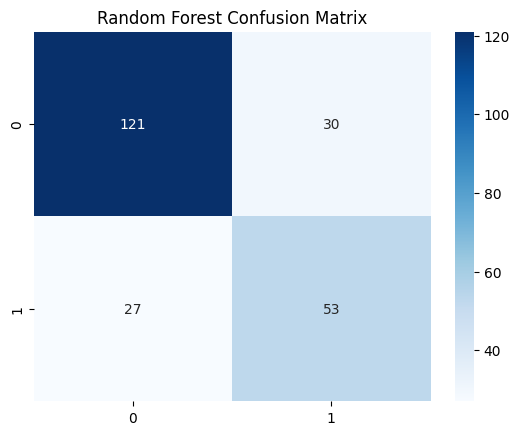

In [5]:
# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluateprint("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

AdaBoost Accuracy: 0.7575757575757576
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       151
           1       0.65      0.64      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



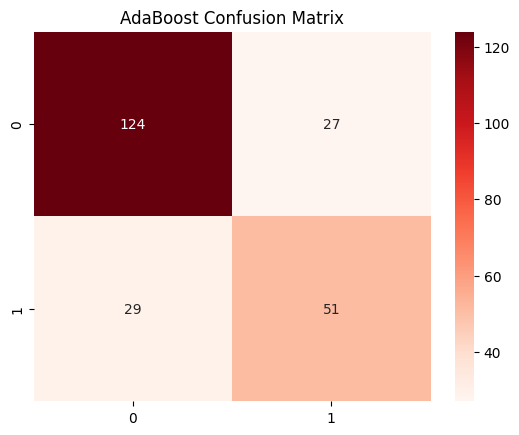

In [6]:
# Initialize and train AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

# Predictions
y_pred_ada = ada.predict(X_test)

# Evaluate
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

# Confusion Matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Reds')
plt.title("AdaBoost Confusion Matrix")
plt.show()

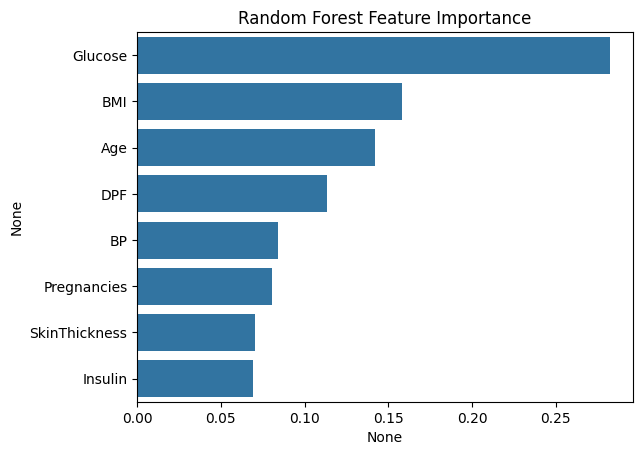

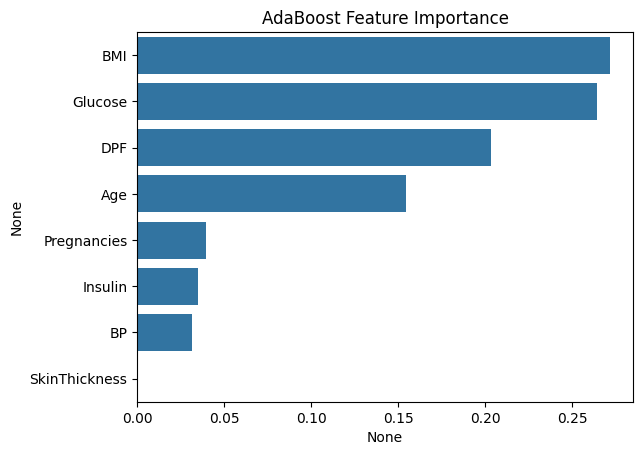

In [7]:
# Random Forest Feature Importance
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=rf_importance, y=rf_importance.index)
plt.title("Random Forest Feature Importance")
plt.show()

# AdaBoost Feature Importance
ada_importance = pd.Series(ada.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=ada_importance, y=ada_importance.index)
plt.title("AdaBoost Feature Importance")
plt.show()